In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display
from scipy.stats import entropy

import sys
sys.path.append('/home/isaac/proj/IMEMEBA-BCI')
import BCI

pd.set_option('display.max_columns', None)

prefix = "/home/isaac/proj/Islands2030/sdb1/CALeDNA-DesertData/"

In [5]:
#pd.read_csv(prefix+"Desert_METABARCODING.csv")
pd.read_csv(prefix+"Desert_MetadataOutput_Metabarcoding.csv")

,name,Sample_Date,Latitude,Longitude,Spatial_Uncertainty,bio01,bio02,bio03,bio04,bio05,bio06,bio07,bio08,bio09,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19,grtgroup,soil pH in H20 at 0 cm,soil pH in H20 at 10 cm,soil pH in H20 at 30 cm,soil pH in H20 at 60 cm,soil pH in H20 at 100 cm,soil pH in H20 at 200 cm,soil organic carbon at 0 cm,soil organic carbon at 10 cm,soil organic carbon at 30 cm,soil organic carbon at 60 cm,soil organic carbon at 100 cm,soil organic carbon at 200 cm,soil sand at 0 cm,soil sand at 10 cm,soil sand at 30 cm,soil sand at 60 cm,soil sand at 100 cm,soil sand at 200 cm,soil clay at 0 cm,soil clay at 10 cm,soil clay at 30 cm,soil clay at 60 cm,soil clay at 100 cm,soil clay at 200 cm,soil bulk density at 0 cm,soil bulk density at 10 cm,soil bulk density at 30 cm,soil bulk density at 60 cm,soil bulk density at 100 cm,soil bulk density at 200 cm,soil texture class at 0 cm,soil texture class at 10 cm,soil texture class at 30 cm,soil texture class at 60 cm,soil texture class at 100 cm,soil texture class at 200 cm,Percent volume soil water content at 0 cm,Percent volume soil water content at 10 cm,Percent volume soil water content at 30 cm,Percent volume soil water content at 60 cm,Percent volume soil water content at 100 cm,Percent volume soil water content at 200 cm,elevation,slope,aspect,gHM,NDVI,EVI,NBRT,greenness,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,total population per hectare,total male population age 0 to 1 per hectare,total male population age 1 to 4 per hectare,total male population age 5 to 9 per hectare,total male population age 10 to 14 per hectare,total male population age 15 to 19 per hectare,total male population age 20 to 24 per hectare,total male population age 25 to 29 per hectare,total male population age 30 to 34 per hectare,total male population age 35 to 39 per hectare,total male population age 40 to 44 per hectare,total male population age 45 to 49 per hectare,total male population age 50 to 54 per hectare,total male population age 55 to 59 per hectare,total male population age 60 to 64 per hectare,total male population age 65 to 65 per hectare,total male population age 70 to 74 per hectare,total male population age 75 to 79 per hectare,total male population age 80 to 84 per hectare,total female population age 0 to 1 per hectare,total female population age 1 to 4 per hectare,total female population age 5 to 9 per hectare,total female population age 10 to 14 per hectare,total female population age 15 to 19 per hectare,total female population age 20 to 24 per hectare,total female population age 25 to 29 per hectare,total female population age 30 to 34 per hectare,total female population age 35 to 39 per hectare,total female population age 40 to 44 per hectare,total female population age 45 to 49 per hectare,total female population age 50 to 54 per hectare,total female population age 55 to 59 per hectare,total female population age 60 to 64 per hectare,total female population age 65 to 65 per hectare,total female population age 70 to 74 per hectare,total female population age 75 to 79 per hectare,total female population age 80 to 84 per hectare,biome_type,Terrestrial travel speed,Walking speed,Average_Radiance,Continuous Heat Insolation Load Index,Landform,FAPAR January,FAPAR February,FAPAR March,FAPAR April,FAPAR May,FAPAR June,FAPAR July,FAPAR August,FAPAR September,FAPAR October,FAPAR November,FAPAR December,FAPAR Annual,FAPAR Annual difference,January rainfall,February rainfall,March rainfall,April rainfall,May rainfall,June rainfall,July rainfall,August rainfall,September rainfall,October rainfall,November rainfall,December rainfall,ECO_NAME,REALM,HYBAS_ID,SUB_AREA,UP_AREA,ENDO,COAST,ORDER,WDPAID,WDPA_PID,DESIG_ENG,IUCN_CAT,MARINE,REP_AREA,STATUS_YR,GOV_TYPE,drifting_longlines,fixed_gear,other_fishing,purse_seines,squid_jigger,trawlers,Chlorophyll a concentration,Particulate organic carbon,Remote sensing reflectance at band 412nm,Remote sensing reflectance at band

In [56]:
pd.read_csv(prefix+"Desert_METABARCODING.csv")


,Data type,Site,Sample ID,Sample Type,Latitude,Longitude,Spatial Uncertainty,Sample Date,Sequencing Platform,Sequence Length,Adapter Type,Marker 1,Marker 1 ForwardPS,Marker 1 ReversePS,Marker 2,Marker 2 ForwardPS,Marker 2 ReversePS,Marker 3,Marker 3 ForwardPS,Marker 3 ReversePS,Marker 4,Marker 4 ForwardPS,Marker 4 ReversePS,Marker 5,Marker 5 ForwardPS,Marker 5 ReversePS,Marker 6,Marker 6 ForwardPS,Marker 6 ReversePS,Fastq Forward Reads Filename,Fastq Reverse Reads Filename,Substrate,depth,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,NaN,Pioneertown Mountain Preserve,K0297-LB-S1,Sample,34.171595,-116.546905,65.0,2017-11-04,Illumina MiSeq,300,Nextera,16S_Bacteria,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,CO1_Metazoa,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,18S_Euk,GTACACACCGCCCGTC,TGATCCTTCTGCAGGTTCACCTAC,ITS1_Fungi,GGAAGTAAAAGTCGTAACAAGG,CAAGAGATCCGTTGTTGAAAGTT,ITS2_Plants,ATGCGATACTTGGTGTGAAT,GACGCTTCTCCAGACTACAAT,trnL_gh,GGGCAATCCTGAGCCAA,CCATTGAGTCTCTGCACCTATC,DesertAG_297B1_S73_L001_R1_001.fastq.gz,DesertAG_297B1_S73_L001_R2_001.fastq.gz,sediment,0.0,NaN,NaN,NaN
1,NaN,Pioneertown Mountain Preserve,K0298-LA-S1,Sample,34.149348,-116.516603,4.0,2017-11-04,Illumina MiSeq,300,Nextera,16S_Bacteria,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,CO1_Metazoa,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,18S_Euk,GTACACACCGCCCGTC,TGATCCTTCTGCAGGTTCACCTAC,ITS1_Fungi,GGAAGTAAAAGTCGTAACAAGG,CAAGAGATCCGTTGTTGAAAGTT,ITS2_Plants,ATGCGATACTTGGTGTGAAT,GACGCTTCTCCAGACTACAAT,trnL_gh,GGGCAATCCTGAGCCAA,CCATTGAGTCTCTGCACCTATC,DesertAG_298A1_S74_L001_R1_001.fastq.gz,DesertAG_298A1_S74_L001_R2_001.fastq.gz,soil,0.0,NaN,NaN,NaN
2,NaN,Pioneertown Mountain Preserve,K0298-LC-S1,Sample,34.146381,-116.516476,0.0,2017-11-04,Illumina MiSeq,300,Nextera,16S_Bacteria,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,CO1_Metazoa,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,18S_Euk,GTACACACCGCCCGTC,TGATCCTTCTGCAGGTTCACCTAC,ITS1_Fungi,GGAAGTAAAAGTCGTAACAAGG,CAAGAGATCCGTTGTTGAAAGTT,ITS2_Plants,ATGCGATACTTGGTGTGAAT,GACGCTTCTCCAGACTACAAT,trnL_gh,GGGCAATCCTGAGCCAA,CCATTGAGTCTCTGCACCTATC,DesertAG_298C1_S75_L001_R1_001.fastq.gz,DesertAG_298C1_S75_L001_R2_001.fastq.gz,soil,0.0,NaN,NaN,NaN
3,NaN,Burns Piñon Ridge Reserve,K0298-LC-S2,Sample,34.139557,-116.455161,36.0,2017-11-05,Illumina MiSeq,300,Nextera,16S_Bacteria,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,CO1_Metazoa,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,18S_Euk,GTACACACCGCCCGTC,TGATCCTTCTGCAGGTTCACCTAC,ITS1_Fungi,GGAAGTAAAAGTCGTAACAAGG,CAAGAGATCCGTTGTTGAAAGTT,ITS2_Plants,ATGCGATACTTGGTGTGAAT,GACGCTTCTCCAGACTACAAT,trnL_gh,GGGCAATCCTGAGCCAA,CCATTGAGTCTCTGCACCTATC,DesertAG_298C2_S76_L001_R1_001.fastq.gz,DesertAG_298C2_S76_L001_R2_001.fastq.gz,soil,0.0,NaN,NaN,NaN
4,NaN,Pioneertown Mountain Preserve,K0299-LA-S2,Sample,34.180360,-116.508130,0.0,2017-11-04,Illumina MiSeq,300,Nextera,16S_Bacteria,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,CO1_Metazoa,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,18S_Euk,GTACACACCGCCCGTC,TGATCCTTCTGCAGGTTCACCTAC,ITS1_Fungi,GGAAGTAAAAGTCGTAACAAGG,CAAGAGATCCGTTGTTGAAAGTT,ITS2_Plants,ATGCGATACTTGGTGTGAAT,GACGCTTCTCCAGACTACAAT,trnL_gh,GGGCAATCCTGAGCCAA,CCATTGAGTCTCTGCACCTATC,DesertAG_299A2_S77_L001_R1_001.fastq.gz,DesertAG_299A2_S77_L001_R2_001.fastq.gz,soil,0.0,NaN,NaN,NaN
5,NaN,Pioneertown Mountain Preserve,K0299-LB-S1,Sample,34.166170,-116.527320,0.0,2017-11-04,Illumina MiSeq,300,Nextera,16S_Bacteria,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,CO1_Metazoa,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,18S_Euk,GTACACACCGCCCGTC,TGATCCTTCTGCAGGTTCACCTAC,ITS1_Fungi,GGAAGTAAAAGTCGTAACAAGG,CAAGAGATCCGTTGTTGAAAGTT,ITS2_Plants,ATGCGATACTTGGTGTGAAT,GACGCTTCTCCAGACTACAAT,trnL_gh,GGGCAATCCTGAGCCAA,CCATTGAGTCTCTGCACCTATC,DesertAG_299B1_S78_L001_R1_001.fastq.gz,DesertAG_299B1_S78_L001_R2_001.fastq.gz,soil,0.0,NaN,NaN,NaN
6,NaN,Pioneertown Mountain Preserve,K0299-LC-S1,Sample,34.180000,-116.507130,0.0,2017-11-04,Illumina MiSeq,300,Nextera,16S_Bacteria,GTGYCAGCMGCCGCGGTAA,GGAC

In [6]:
# Don't do this, it's the full raw data and runs forever
#bci = BCI.BCI(data=prefix+"/raws/DesertAG_297B1_S73_L001_R1_001.fastq.gz")
#bci.run()

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

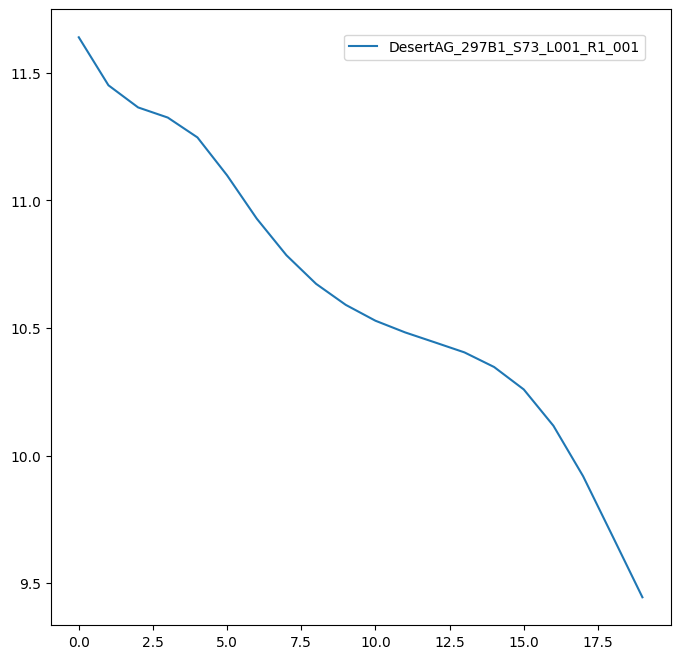

In [17]:
bci.plot(log=True, normalize=False)

## Merge and derep


In [45]:
for samp in glob.glob(prefix+f"/raws/*.fastq.gz"):
    print(samp.split("/")[-1].rsplit("_", 2)[0])

DesertAG-302A2_S85_L001
DesertAG-300B2_S82_L001
DesertVP-334A2_S115_L001
DesertAG-316B1_S95_L001
DesertAG_299C1_S79_L001
DesertAG_299A2_S77_L001
DesertAG-300B2_S82_L001
DesertAG_303C1_S89_L001
DesertVP-pcrneg_S128_L001
DesertVP_350A2_S118_L001
DesertAG-316A2_S94_L001
DesertVP-350C2_S122_L001
DesertAG_303B2_S88_L001
DesertAG_298C1_S75_L001
DesertAG-305C1_S93_L001
DesertAG_321A1_S101_L001
DesertAG_301B1_S84_L001
DesertAG_333C2_S105_L001
DesertAG_299C2_S80_L001
DesertAG_298C2_S76_L001
DesertAG_345A1_S106_L001
DesertAG_299B1_S78_L001
DesertAG-extneg4_S112_L001
DesertVP_352C2_S126_L001
DesertVP_352B2_S125_L001
DesertAG-320B1_S99_L001
DesertVP_352C1_S127_L001
DesertAG-316A2_S94_L001
DesertAG-316B1_S95_L001
DesertAG_303A1_S87_L001
DesertAG_300B1_S81_L001
DesertVP_351A1_S123_L001
DesertVP_350A2_S118_L001
DesertAG-319C2_S97_L001
DesertAG-320A2_S98_L001
DesertAG_305B2_S92_L001
DesertVP_352B2_S125_L001
DesertAG-300C1_S83_L001
DesertAG-320A2_S98_L001
DesertAG_321C1_S102_L001
DesertAG_345A2_S107_L0

In [47]:
sample = "DesertAG_297B1_S73"
def process_sample(sample):
    r1, r2 = glob.glob(prefix+f"/raws/{sample}*_001.fastq.gz")
    tmpdir = bci.tmpdir
    merged = f"{tmpdir}/{sample}_merged.fasta"
    unmerged_r1 = f"{tmpdir}/{sample}_unmerged_R1.fastq"
    unmerged_r2 = f"{tmpdir}/{sample}_unmerged_R2.fastq"
    derep = f"{tmpdir}/{sample}_derep.fasta"
    denoised = f"{tmpdir}/{sample}_denoise.fasta"

    # --quiet
    !vsearch --fastq_mergepairs $r1 --reverse $r2 --fastaout $merged --fastqout_notmerged_fwd $unmerged_r1 --fastqout_notmerged_rev $unmerged_r2 --fastq_allowmergestagger --fasta_width 0 --threads 2

    !vsearch --derep_fulllength $merged --output $derep --fasta_width 0 --sizeout

    !vsearch --cluster_unoise $derep --centroids $denoised --fasta_width 0 --xsize
    
    return denoised
# cutadapt remove adapters
# --uchime2_denovo

In [48]:
denoise_files = {}
for samp in glob.glob(prefix+f"/raws/*.fastq.gz"):
    sample = samp.split("/")[-1].rsplit("_", 2)[0]
    print(sample)
    denoise_files[sample] = process_sample(sample)

DesertAG-302A2_S85_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                                            
    109837  Pairs
    100553  Merged (91.5%)
      9284  Not merged (8.5%)

Pairs that failed merging due to various reasons:
       232  too few kmers found on same diagonal
      3498  too many differences
      5553  alignment score too low, or score drop too high
         1  overlap too short

Statistics of all reads:
    299.26  Mean read length

Statistics of merged reads:
    239.85  Mean fragment length
    129.85  Standard deviation of fragment length
      0.24  Mean expected error in forward sequences
      0.99  Mean expected error in reverse sequences
      0.10  Mean expected error in merged sequences
      0.19  Mean observed errors in merged region of forward sequences
      1.01  Mean observed errors in merged region of reverse sequences
      1.20  Mean observed errors in merged region
vsearch v

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG_299C1_S79_L001_merged.fasta 100%   
18128841 nt in 174704 seqs, min 33, max 524, avg 104
minseqlength 32: 6 sequences discarded.
Sorting 100%
28145 unique sequences, avg cluster 6.2, median 1, max 50247
Writing output file 100% 
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG_299C1_S79_L001_derep.fasta 100%  
93084 nt in 744 seqs, min 43, max 480, avg 125
minsize 8: 27401 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%   
Sorting clusters 100%
Writing clusters 100% 
Clusters: 218 Size min 1, max 187, avg 3.4
Singletons: 198, 26.6% of seqs, 90.8% of clusters
DesertAG_299A2_S77_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%

Clustering 100%   
Sorting clusters 100%
Writing clusters 100% 
Clusters: 65 Size min 1, max 118, avg 3.9
Singletons: 63, 25.0% of seqs, 96.9% of clusters
DesertVP_350A2_S118_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                              
     77957  Pairs
     69855  Merged (89.6%)
      8102  Not merged (10.4%)

Pairs that failed merging due to various reasons:
        99  too few kmers found on same diagonal
         2  multiple potential alignments
      3125  too many differences
      4875  alignment score too low, or score drop too high
         1  overlap too short

Statistics of all reads:
    299.37  Mean read length

Statistics of merged reads:
    284.83  Mean fragment length
    160.38  Standard deviation of fragment length
      1.49  Mean expected error in forward sequences
      0.27  Mean expected error in reverse sequences
      0.19  Mean expected error in merged sequences
      1.48  Mean

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG_298C1_S75_L001_merged.fasta 100%   
22588613 nt in 119381 seqs, min 32, max 508, avg 189
minseqlength 32: 79 sequences discarded.
Sorting 100%
25389 unique sequences, avg cluster 4.7, median 1, max 22027
Writing output file 100% 
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG_298C1_S75_L001_derep.fasta 100%  
143936 nt in 727 seqs, min 41, max 507, avg 198
minsize 8: 24662 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%    
Sorting clusters 100%
Writing clusters 100% 
Clusters: 152 Size min 1, max 155, avg 4.8
Singletons: 123, 16.9% of seqs, 80.9% of clusters
DesertAG-305C1_S93_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 1

DesertAG_299C2_S80_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                                      
     96170  Pairs
     85910  Merged (89.3%)
     10260  Not merged (10.7%)

Pairs that failed merging due to various reasons:
       156  too few kmers found on same diagonal
         4  multiple potential alignments
      3073  too many differences
      7027  alignment score too low, or score drop too high

Statistics of all reads:
    299.29  Mean read length

Statistics of merged reads:
    189.63  Mean fragment length
    124.26  Standard deviation of fragment length
      0.18  Mean expected error in forward sequences
      0.88  Mean expected error in reverse sequences
      0.07  Mean expected error in merged sequences
      0.15  Mean observed errors in merged region of forward sequences
      0.92  Mean observed errors in merged region of reverse sequences
      1.07  Mean observed errors in merged region
vs

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG-extneg4_S112_L001_merged.fasta 100%
3615847 nt in 23401 seqs, min 33, max 570, avg 155
minseqlength 32: 31 sequences discarded.
Sorting 100%
4129 unique sequences, avg cluster 5.7, median 1, max 9302
Writing output file 100%


vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG-extneg4_S112_L001_derep.fasta 100%
41358 nt in 188 seqs, min 41, max 294, avg 220
minsize 8: 3941 sequences discarded.
Masking 100%
Sorting by abundance 100%
Counting k-mers 100%


Clustering 100%   
Sorting clusters 100%
Writing clusters 100% 
Clusters: 125 Size min 1, max 55, avg 1.5
Singletons: 118, 62.8% of seqs, 94.4% of clusters
DesertVP_352C2_S126_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                                      
     89501  Pairs
     79185  Merged (88.5%)
     10316  Not merged (11.5%)

Pairs that failed merging due to various reasons:
       101  too few kmers found on same diagonal
       299  multiple potential alignments
      4051  too many differences
      5864  alignment score too low, or score drop too high
         1  overlap too short

Statistics of all reads:
    299.37  Mean read length

Statistics of merged reads:
    228.91  Mean fragment length
    162.41  Standard deviation of fragment length
      1.17  Mean expected error in forward sequences
      0.23  Mean expected error in reverse sequences
      0.13  Mean expected error in merged sequences
      1

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG-316A2_S94_L001_merged.fasta 100%   
25933114 nt in 109253 seqs, min 36, max 585, avg 237
minseqlength 32: 1 sequence discarded.
Sorting 100%
35677 unique sequences, avg cluster 3.1, median 1, max 11336
Writing output file 100%  
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG-316A2_S94_L001_derep.fasta 100%  
151702 nt in 711 seqs, min 40, max 583, avg 213
minsize 8: 34966 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%    
Sorting clusters 100%
Writing clusters 100% 
Clusters: 104 Size min 1, max 165, avg 6.8
Singletons: 80, 11.3% of seqs, 76.9% of clusters
DesertAG-316B1_S95_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertVP_352B2_S125_L001_merged.fasta 100%   
24179762 nt in 90891 seqs, min 33, max 570, avg 266
Sorting 100%
27132 unique sequences, avg cluster 3.3, median 1, max 10084
Writing output file 100%   
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertVP_352B2_S125_L001_derep.fasta 100%  
163642 nt in 608 seqs, min 53, max 543, avg 269
minsize 8: 26524 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%    
Sorting clusters 100%
Writing clusters 100% 
Clusters: 128 Size min 1, max 102, avg 4.8
Singletons: 98, 16.1% of seqs, 76.6% of clusters
DesertAG-300C1_S83_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                                    

Clustering 100%        
Sorting clusters 100%
Writing clusters 100% 
Clusters: 455 Size min 1, max 169, avg 2.1
Singletons: 411, 42.7% of seqs, 90.3% of clusters
DesertAG_301B1_S84_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                                                        
    134333  Pairs
    125610  Merged (93.5%)
      8723  Not merged (6.5%)

Pairs that failed merging due to various reasons:
        96  too few kmers found on same diagonal
        57  multiple potential alignments
      3395  too many differences
      5175  alignment score too low, or score drop too high

Statistics of all reads:
    299.27  Mean read length

Statistics of merged reads:
    210.52  Mean fragment length
    130.80  Standard deviation of fragment length
      0.83  Mean expected error in forward sequences
      0.22  Mean expected error in reverse sequences
      0.11  Mean expected error in merged sequences
      0.83  Mea

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertVP_350C1_S121_L001_merged.fasta 100%
2638981 nt in 18170 seqs, min 44, max 545, avg 145
minseqlength 32: 5 sequences discarded.
Sorting 100%
4108 unique sequences, avg cluster 4.4, median 1, max 4573
Writing output file 100%


vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertVP_350C1_S121_L001_derep.fasta 100%
21931 nt in 174 seqs, min 47, max 477, avg 126
minsize 8: 3934 sequences discarded.
Masking 100%
Sorting by abundance 100%
Counting k-mers 100%


Clustering 100%  
Sorting clusters 100%
Writing clusters 100% 
Clusters: 100 Size min 1, max 49, avg 1.7
Singletons: 95, 54.6% of seqs, 95.0% of clusters
DesertAG_304A1_S90_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                                    
     70139  Pairs
     59592  Merged (85.0%)
     10547  Not merged (15.0%)

Pairs that failed merging due to various reasons:
       124  too few kmers found on same diagonal
       525  multiple potential alignments
      2502  too many differences
      7396  alignment score too low, or score drop too high

Statistics of all reads:
    299.38  Mean read length

Statistics of merged reads:
    234.17  Mean fragment length
    156.98  Standard deviation of fragment length
      0.23  Mean expected error in forward sequences
      1.34  Mean expected error in reverse sequences
      0.14  Mean expected error in merged sequences
      0.15  Mean observed errors in merged

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertVP-350A1_S117_L001_merged.fasta 100%  
14374734 nt in 55073 seqs, min 33, max 502, avg 261
minseqlength 32: 1 sequence discarded.
Sorting 100%
14414 unique sequences, avg cluster 3.8, median 1, max 6776
Writing output file 100% 
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertVP-350A1_S117_L001_derep.fasta 100%  
126158 nt in 440 seqs, min 47, max 500, avg 287
minsize 8: 13974 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%   
Sorting clusters 100%
Writing clusters 100% 
Clusters: 33 Size min 1, max 171, avg 13.3
Singletons: 20, 4.5% of seqs, 60.6% of clusters
DesertAG-320B2_S100_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%  

Clustering 100%  
Sorting clusters 100%
Writing clusters 100% 
Clusters: 218 Size min 1, max 187, avg 3.4
Singletons: 198, 26.6% of seqs, 90.8% of clusters
DesertAG_304A1_S90_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                                    
     70139  Pairs
     59592  Merged (85.0%)
     10547  Not merged (15.0%)

Pairs that failed merging due to various reasons:
       124  too few kmers found on same diagonal
       525  multiple potential alignments
      2502  too many differences
      7396  alignment score too low, or score drop too high

Statistics of all reads:
    299.38  Mean read length

Statistics of merged reads:
    234.17  Mean fragment length
    156.98  Standard deviation of fragment length
      0.23  Mean expected error in forward sequences
      1.34  Mean expected error in reverse sequences
      0.14  Mean expected error in merged sequences
      0.15  Mean observed errors in merg

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG_321A1_S101_L001_merged.fasta 100%   
27008524 nt in 185614 seqs, min 33, max 570, avg 146
minseqlength 32: 27 sequences discarded.
Sorting 100%
32785 unique sequences, avg cluster 5.7, median 1, max 41363
Writing output file 100% 
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG_321A1_S101_L001_derep.fasta 100%  
177988 nt in 1048 seqs, min 39, max 481, avg 170
minsize 8: 31737 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%    
Sorting clusters 100%
Writing clusters 100% 
Clusters: 296 Size min 1, max 236, avg 3.5
Singletons: 250, 23.9% of seqs, 84.5% of clusters
DesertAG_305B2_S92_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging read

DesertVP-334A1_S114_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                                  
     77487  Pairs
     54775  Merged (70.7%)
     22712  Not merged (29.3%)

Pairs that failed merging due to various reasons:
       165  too few kmers found on same diagonal
         1  multiple potential alignments
      2104  too many differences
     20442  alignment score too low, or score drop too high

Statistics of all reads:
    299.39  Mean read length

Statistics of merged reads:
    182.66  Mean fragment length
     89.40  Standard deviation of fragment length
      0.85  Mean expected error in forward sequences
      0.16  Mean expected error in reverse sequences
      0.06  Mean expected error in merged sequences
      0.88  Mean observed errors in merged region of forward sequences
      0.13  Mean observed errors in merged region of reverse sequences
      1.00  Mean observed errors in merged region
vsear

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG_345A1_S106_L001_merged.fasta 100%  
18621436 nt in 93957 seqs, min 33, max 576, avg 198
minseqlength 32: 2 sequences discarded.
Sorting 100%
28314 unique sequences, avg cluster 3.3, median 1, max 13951
Writing output file 100% 
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG_345A1_S106_L001_derep.fasta 100%  
84834 nt in 493 seqs, min 40, max 561, avg 172
minsize 8: 27821 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%     
Sorting clusters 100%
Writing clusters 100% 
Clusters: 210 Size min 1, max 55, avg 2.3
Singletons: 169, 34.3% of seqs, 80.5% of clusters
DesertAG_297B1_S73_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG-302B2_S86_L001_merged.fasta 100%   
20933158 nt in 97289 seqs, min 35, max 582, avg 215
minseqlength 32: 8 sequences discarded.
Sorting 100%
25523 unique sequences, avg cluster 3.8, median 1, max 16134
Writing output file 100% 
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG-302B2_S86_L001_derep.fasta 100%  
135306 nt in 675 seqs, min 43, max 581, avg 200
minsize 8: 24848 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%     
Sorting clusters 100%
Writing clusters 100% 
Clusters: 206 Size min 1, max 265, avg 3.3
Singletons: 182, 27.0% of seqs, 88.3% of clusters
DesertVP_350B1_S119_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 1

DesertVP-350C2_S122_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                                        
     93395  Pairs
     81198  Merged (86.9%)
     12197  Not merged (13.1%)

Pairs that failed merging due to various reasons:
       277  too few kmers found on same diagonal
         1  multiple potential alignments
      4071  too many differences
      7848  alignment score too low, or score drop too high

Statistics of all reads:
    299.57  Mean read length

Statistics of merged reads:
    258.25  Mean fragment length
     92.18  Standard deviation of fragment length
      1.75  Mean expected error in forward sequences
      0.27  Mean expected error in reverse sequences
      0.07  Mean expected error in merged sequences
      1.64  Mean observed errors in merged region of forward sequences
      0.19  Mean observed errors in merged region of reverse sequences
      1.83  Mean observed errors in merged region

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG-320B2_S100_L001_merged.fasta 100%  
17000554 nt in 79103 seqs, min 41, max 582, avg 215
minseqlength 32: 1 sequence discarded.
Sorting 100%
25280 unique sequences, avg cluster 3.1, median 1, max 11436
Writing output file 100% 
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG-320B2_S100_L001_derep.fasta 100%  
110349 nt in 564 seqs, min 53, max 580, avg 196
minsize 8: 24716 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%      
Sorting clusters 100%
Writing clusters 100% 
Clusters: 161 Size min 1, max 168, avg 3.5
Singletons: 144, 25.5% of seqs, 89.4% of clusters
DesertAG_299C2_S80_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 1

DesertAG_304C2_S91_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                              
     75013  Pairs
     67523  Merged (90.0%)
      7490  Not merged (10.0%)

Pairs that failed merging due to various reasons:
       270  too few kmers found on same diagonal
         2  multiple potential alignments
      2041  too many differences
      5177  alignment score too low, or score drop too high

Statistics of all reads:
    299.33  Mean read length

Statistics of merged reads:
    212.18  Mean fragment length
    125.87  Standard deviation of fragment length
      0.22  Mean expected error in forward sequences
      0.95  Mean expected error in reverse sequences
      0.09  Mean expected error in merged sequences
      0.18  Mean observed errors in merged region of forward sequences
      0.91  Mean observed errors in merged region of reverse sequences
      1.09  Mean observed errors in merged region
vsearch v2

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG-extneg2_S110_L001_merged.fasta 100%  
191812 nt in 2856 seqs, min 39, max 513, avg 67
Sorting 100%
412 unique sequences, avg cluster 6.9, median 1, max 1864
Writing output file 100% 
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG-extneg2_S110_L001_derep.fasta 100%  
1827 nt in 17 seqs, min 43, max 340, avg 107
minsize 8: 395 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%  
Sorting clusters 100%
Writing clusters 100% 
Clusters: 9 Size min 1, max 9, avg 1.9
Singletons: 8, 47.1% of seqs, 88.9% of clusters
DesertAG_304C2_S91_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%                              
     75013  Pairs
     

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100% 
      3204  Pairs
      2856  Merged (89.1%)
       348  Not merged (10.9%)

Pairs that failed merging due to various reasons:
        22  too few kmers found on same diagonal
        38  too many differences
       288  alignment score too low, or score drop too high

Statistics of all reads:
    299.11  Mean read length

Statistics of merged reads:
     67.16  Mean fragment length
     59.05  Standard deviation of fragment length
      0.06  Mean expected error in forward sequences
      0.17  Mean expected error in reverse sequences
      0.02  Mean expected error in merged sequences
      0.06  Mean observed errors in merged region of forward sequences
      0.22  Mean observed errors in merged region of reverse sequences
      0.27  Mean observed errors in merged region
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating fi

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertVP-350A1_S117_L001_merged.fasta 100%  
14374734 nt in 55073 seqs, min 33, max 502, avg 261
minseqlength 32: 1 sequence discarded.
Sorting 100%
14414 unique sequences, avg cluster 3.8, median 1, max 6776
Writing output file 100% 
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertVP-350A1_S117_L001_derep.fasta 100%  
126158 nt in 440 seqs, min 47, max 500, avg 287
minsize 8: 13974 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%  
Sorting clusters 100%
Writing clusters 100% 
Clusters: 33 Size min 1, max 171, avg 13.3
Singletons: 20, 4.5% of seqs, 60.6% of clusters
DesertAG-300C1_S83_L001
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Merging reads 100%    

vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Dereplicating file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG_345C1_S108_L001_merged.fasta 100%   
22412557 nt in 97795 seqs, min 39, max 552, avg 229
minseqlength 32: 4 sequences discarded.
Sorting 100%
33828 unique sequences, avg cluster 2.9, median 1, max 13766
Writing output file 100%   
vsearch v2.18.0_linux_x86_64, 251.7GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file ./.tmpdir-DesertAG_297B1_S73_denoise/DesertAG_345C1_S108_L001_derep.fasta 100%  
110547 nt in 560 seqs, min 43, max 551, avg 197
minsize 8: 33268 sequences discarded.
Masking 100% 
Sorting by abundance 100%
Counting k-mers 100% 
Clustering 100%    
Sorting clusters 100%
Writing clusters 100% 
Clusters: 167 Size min 1, max 119, avg 3.4
Singletons: 141, 25.2% of seqs, 84.4% of clusters


In [49]:
%%time
bcis = {}
for k, v in denoise_files.items():
    print(k)
    bcis[k] = BCI.BCI(data=v)
    bcis[k].run()

DesertAG-302A2_S85_L001
DesertAG-300B2_S82_L001
DesertVP-334A2_S115_L001
DesertAG-316B1_S95_L001
DesertAG_299C1_S79_L001
DesertAG_299A2_S77_L001
DesertAG_303C1_S89_L001
DesertVP-pcrneg_S128_L001
DesertVP_350A2_S118_L001
DesertAG-316A2_S94_L001
DesertVP-350C2_S122_L001
DesertAG_303B2_S88_L001
DesertAG_298C1_S75_L001
DesertAG-305C1_S93_L001
DesertAG_321A1_S101_L001
DesertAG_301B1_S84_L001
DesertAG_333C2_S105_L001
DesertAG_299C2_S80_L001
DesertAG_298C2_S76_L001
DesertAG_345A1_S106_L001
DesertAG_299B1_S78_L001
DesertAG-extneg4_S112_L001
DesertVP_352C2_S126_L001
DesertVP_352B2_S125_L001
DesertAG-320B1_S99_L001
DesertVP_352C1_S127_L001
DesertAG_303A1_S87_L001
DesertAG_300B1_S81_L001
DesertVP_351A1_S123_L001
DesertAG-319C2_S97_L001
DesertAG-320A2_S98_L001
DesertAG_305B2_S92_L001
DesertAG-300C1_S83_L001
DesertAG_321C1_S102_L001
DesertAG_345A2_S107_L001
DesertVP_352A2_S124_L001
DesertVP_350C1_S121_L001
DesertAG_304A1_S90_L001
DesertVP-350A1_S117_L001
DesertAG-320B2_S100_L001
DesertVP_334B2_S116

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

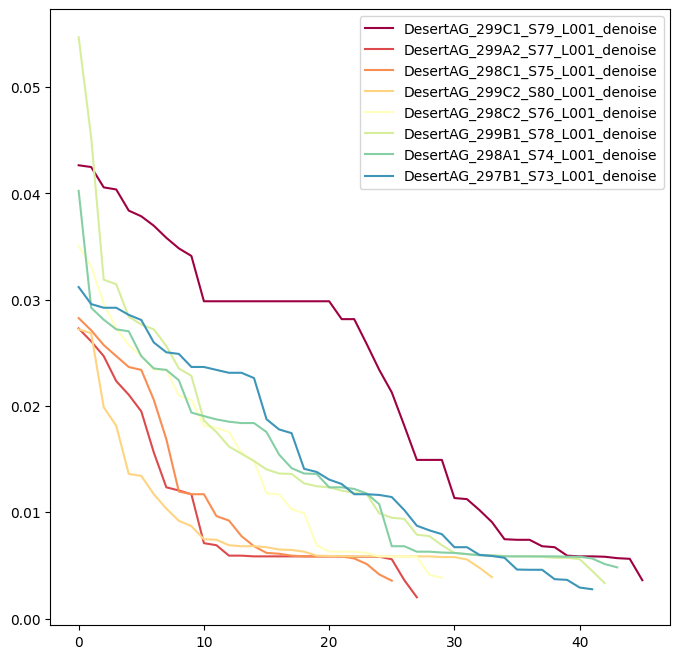

In [55]:
BCI.plot_multi([x for x in bcis.values() if "29" in x.samp], log=True, normalize=False, plot_pis=True)

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

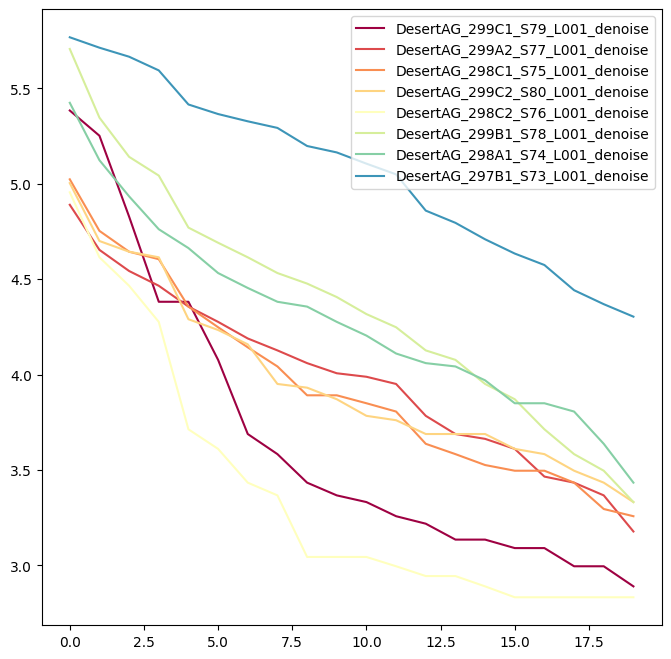

In [57]:
BCI.plot_multi([x for x in bcis.values() if "29" in x.samp], log=True, normalize=False, plot_pis=False)

In [40]:
np.array(sorted(bci.pis.values(), reverse=True))
#bci.nucleotide_diversity(verbose=True)
#bci._muscle_cmds
#!ls -a .tmpdir-DesertAG_297B1_S73_denoise/OTU-0.97_fastas/
#!muscle -align './.tmpdir-DesertAG_297B1_S73_denoise/OTU-0.97_fastas/M01551:44:000000000-BWJBF:1:1101:18841:4770;size=21.fasta' -output ./.tmpdir-DesertAG_297B1_S73_denoise/OTU-0.97_fastas/M01551:44:000000000-BWJBF:1:1101:18841:4770;size=21.fasta.aln -quiet -threads 2
                                        

array([0.03118908, 0.0295858 , 0.02923977, 0.02923977, 0.02857143,
       0.02808989, 0.02597403, 0.02504817, 0.02489627, 0.02366864,
       0.02366864, 0.02339181, 0.02312139, 0.02312139, 0.02262443,
       0.01875   , 0.01779359, 0.01744186, 0.01408451, 0.0137931 ,
       0.0130719 , 0.01265823, 0.01169591, 0.01169591, 0.01162791,
       0.01142857, 0.01020408, 0.00873362, 0.00829876, 0.00793651,
       0.00671141, 0.00671141, 0.00598802, 0.00588235, 0.00571429,
       0.00460829, 0.00458716, 0.00458716, 0.0037037 , 0.00363636,
       0.00291545, 0.00275482])